In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [27]:
# path = 'continuous_train.csv'
# data = pd.read_csv(path, sep = ',', na_filter = False)
data = pd.read_csv('datanew.csv', sep = ',', encoding = 'UTF-8')
#datos = data.set_index('id')
X_train = data.drop(columns = ['y']).copy()
y_train = data[['y']].copy()

In [28]:
# path = 'continuous_test.csv'
# test = pd.read_csv(path, sep = ',', na_filter = False)
# X_test = test.drop(columns = ['y']).copy()
# y_test = test[['y']].copy()

In [29]:
def calculated_metrics(variablesSelected,X_trained_scaled,y_train,X_test_scaled,y_test):
    X_trained_scaled_aux = X_trained_scaled[variablesSelected].copy()
    X_test_scaled_aux = X_test_scaled[variablesSelected].copy()
    ## Regresion para cada cantidad de variables
    regr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                   normalize=False)

    # Train the model using the training sets
    regr.fit(X_trained_scaled_aux,  y_train['y'].values)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test_scaled_aux)

    y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=["y_pred"])

    total = y_pred.join(y_test)
    total['y_menor_-1'] = (total['y']<-1).astype(int)
    total['y_pred_menor_-1'] = (total['y_pred']<-1).astype(int)
    total['good_class'] = (total['y_menor_-1']==total['y_pred_menor_-1']).astype(int)
    mse = mean_squared_error(y_test, y_pred)
    accuray =total['good_class'].sum()/len(total)
    r2 = r2_score(y_test, y_pred)
    return mse,accuray,r2

In [30]:
modelToProof = [['X1','X2','X4','X5','X8','X9','X11','X12','X13','X14','X16','X17','X18','X19','X24','X30','X32','X33','X35','X39','X44','X48']]

In [31]:
modelToProof.append(['X1','X2','X4','X8','X11','X13','X14','X16','X17','X18','X19','X24','X33','X35','X39','X44'])

In [32]:
modelToProof.append(['X1','X4','X11','X13','X16','X18','X19','X39'])

In [33]:
modelToProof.append(['X11','X18','X39'])

In [34]:
resultados =  pd.DataFrame()
r2_total =  pd.DataFrame()
mse_total =  pd.DataFrame()
accuracy_total =  pd.DataFrame()
for variablesTorun in modelToProof:
    print(variablesTorun)
    mse = []
    accuray = []
    r2 = []
    if len(variablesTorun)>0:
        for j in range(1,3000):
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(X_train, y_train, test_size=0.2)
            standarscaler = StandardScaler()
            X_trained_scaled_aux = standarscaler.fit_transform(X_train_aux)
            X_trained_scaled_aux = pd.DataFrame(X_trained_scaled_aux, index=X_train_aux.index, columns=X_train.columns.values)

            X_test_scaled_aux = standarscaler.transform(X_test_aux)

            X_test_scaled_aux = pd.DataFrame(X_test_scaled_aux, index=X_test_aux.index, columns=X_test_aux.columns.values)


            variablesSelected = list(variablesTorun)
            mse_aux,accuray_aux,r2_aux= calculated_metrics(variablesSelected,X_trained_scaled_aux,y_train_aux,X_test_scaled_aux,y_test_aux)
            mse.append(mse_aux)
            accuray.append(accuray_aux)
            r2.append(r2_aux)

        auxRes= pd.DataFrame({'Modelo': [variablesTorun], 'Median: Mean squared error': [np.median(np.asarray(mse))], 'Median: R2': [np.median(np.asarray(r2))],'Median: Accuray': [np.median(np.asarray(accuray))]})
        resultados = pd.concat([resultados,auxRes])
        name = ','.join(variablesTorun)
        r2_total[name] = r2
        mse_total[name] = mse
        accuracy_total[name] = accuray
#         break
#         resultados.to_csv('ResultadosCV_scores.csv')
    else:
        print(f"El conjunto de variables {variablesTorun} no tiene variables")
#     break
# resultado_scores_ranking_cv.reset_index(inplace = True,drop = True)

['X1', 'X2', 'X4', 'X5', 'X8', 'X9', 'X11', 'X12', 'X13', 'X14', 'X16', 'X17', 'X18', 'X19', 'X24', 'X30', 'X32', 'X33', 'X35', 'X39', 'X44', 'X48']
['X1', 'X2', 'X4', 'X8', 'X11', 'X13', 'X14', 'X16', 'X17', 'X18', 'X19', 'X24', 'X33', 'X35', 'X39', 'X44']
['X1', 'X4', 'X11', 'X13', 'X16', 'X18', 'X19', 'X39']
['X11', 'X18', 'X39']


In [35]:
resultados.sort_values('Median: Mean squared error')

,Modelo,Median: Mean squared error,Median: R2,Median: Accuray
0,"[X11, X18, X39]",9.927440,0.063894,0.85
0,"[X1, X4, X11, X13, X16, X18, X19, X39]",9.958740,0.060112,0.85
0,"[X1, X2, X4, X8, X11, X13, X14, X16, X17, X18,...",10.434914,0.021786,0.85
0,"[X1, X2, X4, X5, X8, X9, X11, X12, X13, X14, X...",10.952470,-0.042675,0.85


In [36]:
resultado_total = mse_total.describe().T

In [37]:
resultado_total.sort_values(['std','50%'])

,count,mean,std,min,25%,50%,75%,max
"X11,X18,X39",2999.0,10.011075,1.965675,4.398202,8.659089,9.927440,11.310739,17.700825
"X1,X2,X4,X8,X11,X13,X14,X16,X17,X18,X19,X24,X33,X35,X39,X44",2999.0,10.515213,1.996613,5.134963,9.113256,10.434914,11.862964,17.853535
"X1,X4,X11,X13,X16,X18,X19,X39",2999.0,10.073257,2.066249,4.117496,8.616467,9.958740,11.406466,19.859099
"X1,X2,X4,X5,X8,X9,X11,X12,X13,X14,X16,X17,X18,X19,X24,X30,X32,X33,X35,X39,X44,X48",2999.0,11.088570,2.280481,4.528519,9.512151,10.952470,12.539328,19.387595


<IPython.core.display.Javascript object>


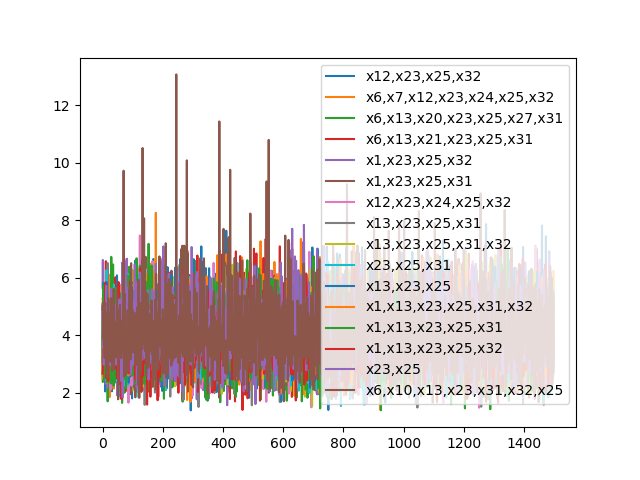

In [26]:
%matplotlib notebook
mse_total.plot()